DATA VISUALIZATION

In [5]:
import pandas as pd
df=pd.read_csv('cleaned_tennis_grand_slam_data.csv')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         63 non-null     int64  
 1   TOURNAMENT                   63 non-null     object 
 2   WINNER                       63 non-null     object 
 3   RUNNER-UP                    63 non-null     object 
 4   WINNER_NATIONALITY           63 non-null     object 
 5   WINNER_ATP_RANKING           63 non-null     int64  
 6   RUNNER-UP_ATP_RANKING        63 non-null     int64  
 7   WINNER_LEFT_OR_RIGHT_HANDED  63 non-null     object 
 8   TOURNAMENT_SURFACE           63 non-null     object 
 9   WINNER_PRIZE                 63 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.1+ KB
None


In [7]:
#data preparation with pandas
import pandas as pd

df = pd.read_csv('cleaned_tennis_grand_slam_data.csv')

print(df.dtypes)

df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

df['YEAR'] = df['YEAR'].dt.year

print(df)


YEAR                             int64
TOURNAMENT                      object
WINNER                          object
RUNNER-UP                       object
WINNER_NATIONALITY              object
WINNER_ATP_RANKING               int64
RUNNER-UP_ATP_RANKING            int64
WINNER_LEFT_OR_RIGHT_HANDED     object
TOURNAMENT_SURFACE              object
WINNER_PRIZE                   float64
dtype: object
    YEAR       TOURNAMENT           WINNER           RUNNER-UP  \
0   2023  australian open   novak djokovic  stefanos tsitsipas   
1   2022        u.s. open   carlos alcaraz         casper rudd   
2   2022      french open     rafael nadal         casper rudd   
3   2022  australian open     rafael nadal     daniil medvedev   
4   2021        u.s. open  daniil medvedev      novak djokovic   
..   ...              ...              ...                 ...   
58  2008  australian open   novak djokovic  jo-wilfried tsonga   
59  2007        u.s. open    roger federer      novak djokovic   
60

In [8]:
player_wins_per_year = df.groupby(['YEAR', 'WINNER']).size().reset_index(name='WINS')

In [9]:
print(player_wins_per_year)

    YEAR                 WINNER  WINS
0   2007           rafael nadal     1
1   2007          roger federer     3
2   2008         novak djokovic     1
3   2008           rafael nadal     2
4   2008          roger federer     1
5   2009  juan martin del potro     1
6   2009           rafael nadal     1
7   2009          roger federer     2
8   2010           rafael nadal     3
9   2010          roger federer     1
10  2011         novak djokovic     3
11  2011           rafael nadal     1
12  2012            andy murray     1
13  2012         novak djokovic     1
14  2012           rafael nadal     1
15  2012          roger federer     1
16  2013            andy murray     1
17  2013         novak djokovic     1
18  2013           rafael nadal     2
19  2014            marin cilic     1
20  2014         novak djokovic     1
21  2014           rafael nadal     1
22  2014          stan wawrinka     1
23  2015         novak djokovic     3
24  2015          stan wawrinka     1
25  2016    

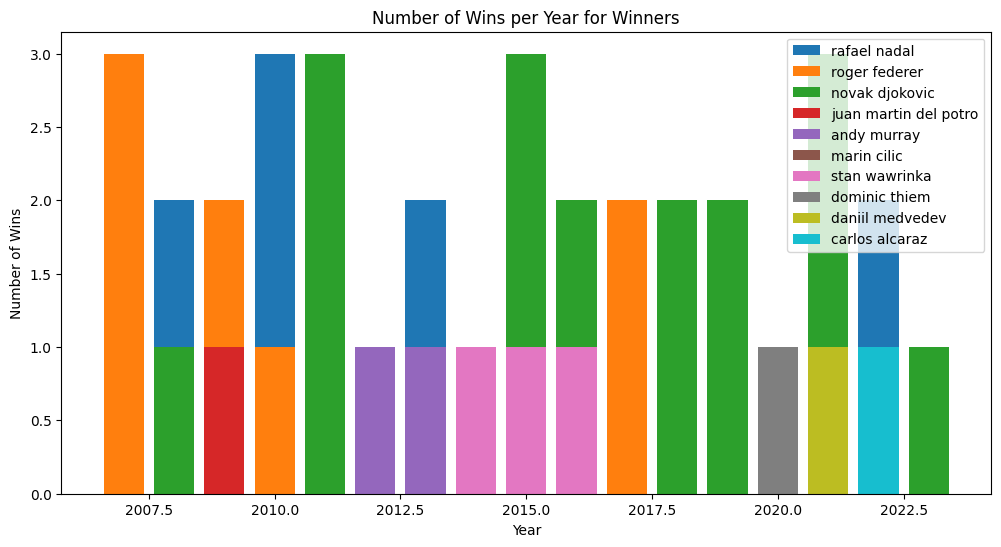

In [11]:
#For all the players
import matplotlib.pyplot as plt

unique_players = player_wins_per_year['WINNER'].unique()

plt.figure(figsize=(12, 6))

for player_name in unique_players:
    player_data = player_wins_per_year[player_wins_per_year['WINNER'].str.lower() == player_name.lower()]
    plt.bar(player_data['YEAR'], player_data['WINS'], label=player_name)

plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Number of Wins per Year for Winners')

plt.legend()

plt.show()


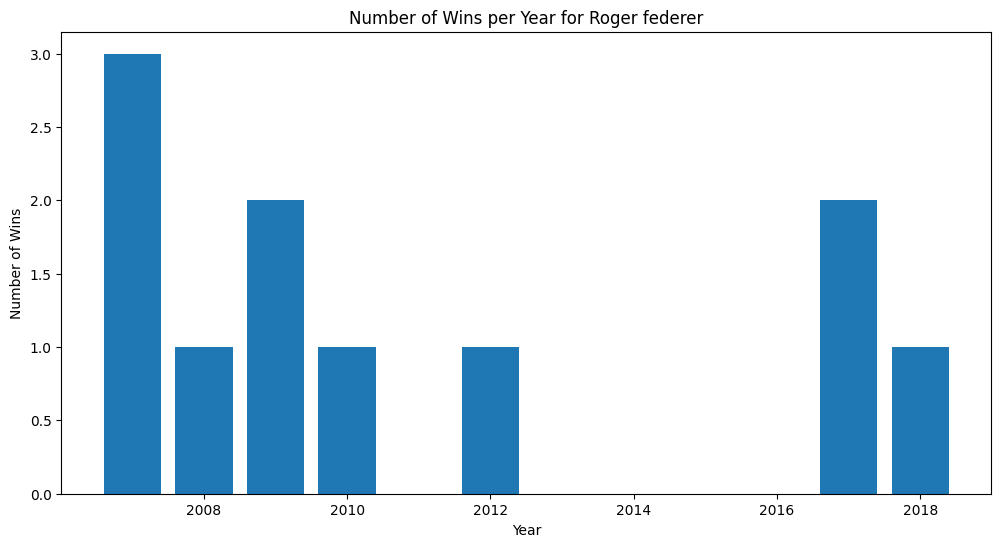

In [14]:
#for single player
import matplotlib.pyplot as plt

player_name = 'roger federer'
player_data = player_wins_per_year[player_wins_per_year['WINNER'].str.lower() == player_name]

plt.figure(figsize=(12, 6))
plt.bar(player_data['YEAR'], player_data['WINS'])
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title(f'Number of Wins per Year for {player_name.capitalize()}')
plt.show()


In [15]:
player_wins_per_year.to_csv('player_wins_per_year.csv', index=False)

In [16]:
print(player_wins_per_year)

    YEAR                 WINNER  WINS
0   2007           rafael nadal     1
1   2007          roger federer     3
2   2008         novak djokovic     1
3   2008           rafael nadal     2
4   2008          roger federer     1
5   2009  juan martin del potro     1
6   2009           rafael nadal     1
7   2009          roger federer     2
8   2010           rafael nadal     3
9   2010          roger federer     1
10  2011         novak djokovic     3
11  2011           rafael nadal     1
12  2012            andy murray     1
13  2012         novak djokovic     1
14  2012           rafael nadal     1
15  2012          roger federer     1
16  2013            andy murray     1
17  2013         novak djokovic     1
18  2013           rafael nadal     2
19  2014            marin cilic     1
20  2014         novak djokovic     1
21  2014           rafael nadal     1
22  2014          stan wawrinka     1
23  2015         novak djokovic     3
24  2015          stan wawrinka     1
25  2016    

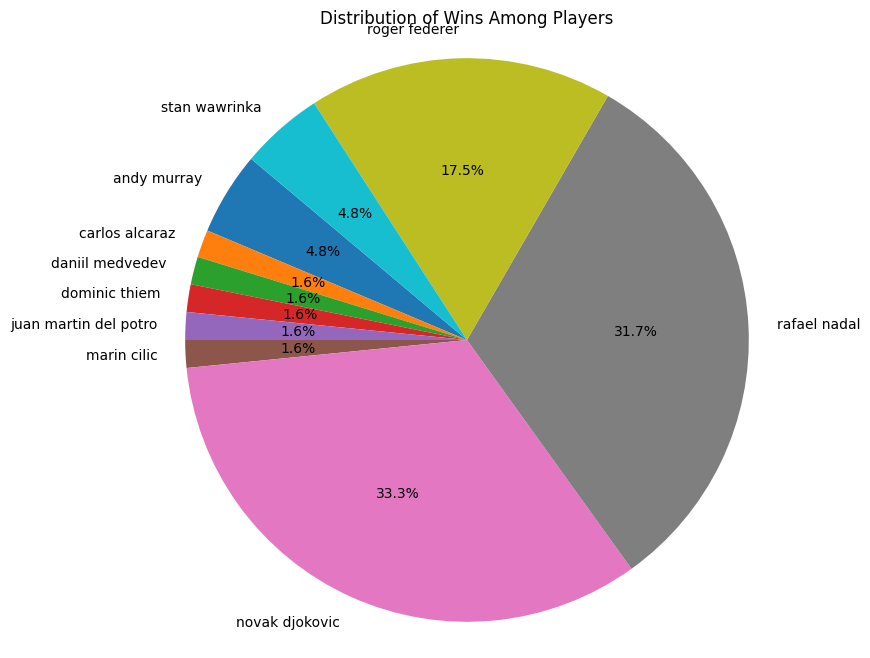

In [17]:
import matplotlib.pyplot as plt

player_total_wins = player_wins_per_year.groupby('WINNER')['WINS'].sum()

plt.figure(figsize=(8, 8))
plt.pie(player_total_wins, labels=player_total_wins.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Wins Among Players')
plt.show()
